In [9]:
import warnings
#from text_unidecode import unidecode
from collections import deque



import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')

In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel("SA_Company_Info.xlsx")
data

,Symbol,Industry,Sector
0,AAP,Consumer Discretionary,Automotive Retail
1,AZO,Consumer Discretionary,Automotive Retail
2,BKNG,Consumer Discretionary,Internet and Direct Marketing Retail
3,BWA,Consumer Discretionary,Auto Parts and Equipment
4,KMX,Consumer Discretionary,Automotive Retail
5,CCL,Consumer Discretionary,"Hotels, Resorts and Cruise Lines"
6,CMG,Consumer Discretionary,Restaurants
7,DRI,Consumer Discretionary,Restaurants
8,DLTR,Consumer Discretionary,General Merchandise Stores
9,DPZ,Consumer Discretionary,Restaurants


In [34]:
 data.loc[data['Industry'] == 'Consumer Discretionary']:
    print(element)
    

Symbol
Industry
Sector


In [2]:
# Company and Industry,Sector for each relation
source_target_list = []
for row in data.values:
    source_target_list.append([row[0], row[1]])
    source_target_list.append([row[0], row[2]])
source_target_list

[['AAP', 'Consumer Discretionary'],
 ['AAP', 'Automotive Retail'],
 ['AZO', 'Consumer Discretionary'],
 ['AZO', 'Automotive Retail'],
 ['BKNG', 'Consumer Discretionary'],
 ['BKNG', 'Internet and Direct Marketing Retail'],
 ['BWA', 'Consumer Discretionary'],
 ['BWA', 'Auto Parts and Equipment'],
 ['KMX', 'Consumer Discretionary'],
 ['KMX', 'Automotive Retail'],
 ['CCL', 'Consumer Discretionary'],
 ['CCL', 'Hotels, Resorts and Cruise Lines'],
 ['CMG', 'Consumer Discretionary'],
 ['CMG', 'Restaurants'],
 ['DRI', 'Consumer Discretionary'],
 ['DRI', 'Restaurants'],
 ['DLTR', 'Consumer Discretionary'],
 ['DLTR', 'General Merchandise Stores'],
 ['DPZ', 'Consumer Discretionary'],
 ['DPZ', 'Restaurants'],
 ['DHI', 'Consumer Discretionary'],
 ['DHI', 'Homebuilding'],
 ['EBAY', 'Consumer Discretionary'],
 ['EBAY', 'Internet and Direct Marketing Retail'],
 ['EXPE', 'Consumer Discretionary'],
 ['EXPE', 'Internet and Direct Marketing Retail'],
 ['F', 'Consumer Discretionary'],
 ['F', 'Automobile Man

In [6]:
# Insustry, Sector relations
# Company and Industry,Sector for each relation
source_target_list2 = []
for row in data.values:
    source_target_list2.append([row[1], row[2]])
source_target_list2

source_target_list2_set = []
for element in source_target_list2:
    if element in source_target_list2_set:
        pass
    else:
        source_target_list2_set.append(element)
        
print("industry_sector_list", len(source_target_list2_set))
source_target_list2_set

industry_sector_list 115


[['Consumer Discretionary', 'Automotive Retail'],
 ['Consumer Discretionary', 'Internet and Direct Marketing Retail'],
 ['Consumer Discretionary', 'Auto Parts and Equipment'],
 ['Consumer Discretionary', 'Hotels, Resorts and Cruise Lines'],
 ['Consumer Discretionary', 'Restaurants'],
 ['Consumer Discretionary', 'General Merchandise Stores'],
 ['Consumer Discretionary', 'Homebuilding'],
 ['Consumer Discretionary', 'Automobile Manufacturers'],
 ['Consumer Discretionary', 'Apparel Retail'],
 ['Consumer Discretionary', 'Consumer Electronics'],
 ['Consumer Discretionary', 'Distributors'],
 ['Consumer Discretionary', 'Specialized Consumer Services'],
 ['Consumer Discretionary', 'Apparel, Accessories and Luxury Goods'],
 ['Consumer Discretionary', 'Motorcycle Manufacturers'],
 ['Consumer Discretionary', 'Leisure Products'],
 ['Consumer Discretionary', 'Home Improvement Retail'],
 ['Consumer Discretionary', 'Department Stores'],
 ['Consumer Discretionary', 'Home Furnishings'],
 ['Consumer Disc

In [7]:
source_target_df = pd.DataFrame(source_target_list + source_target_list2_set, columns = ['Source', 'Target'])
source_target_df

,Source,Target
0,AAP,Consumer Discretionary
1,AAP,Automotive Retail
2,AZO,Consumer Discretionary
3,AZO,Automotive Retail
4,BKNG,Consumer Discretionary
5,BKNG,Internet and Direct Marketing Retail
6,BWA,Consumer Discretionary
7,BWA,Auto Parts and Equipment
8,KMX,Consumer Discretionary
9,KMX,Automotive Retail


C:\Users\conor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\conor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<function matplotlib.pyplot.show(*args, **kw)>

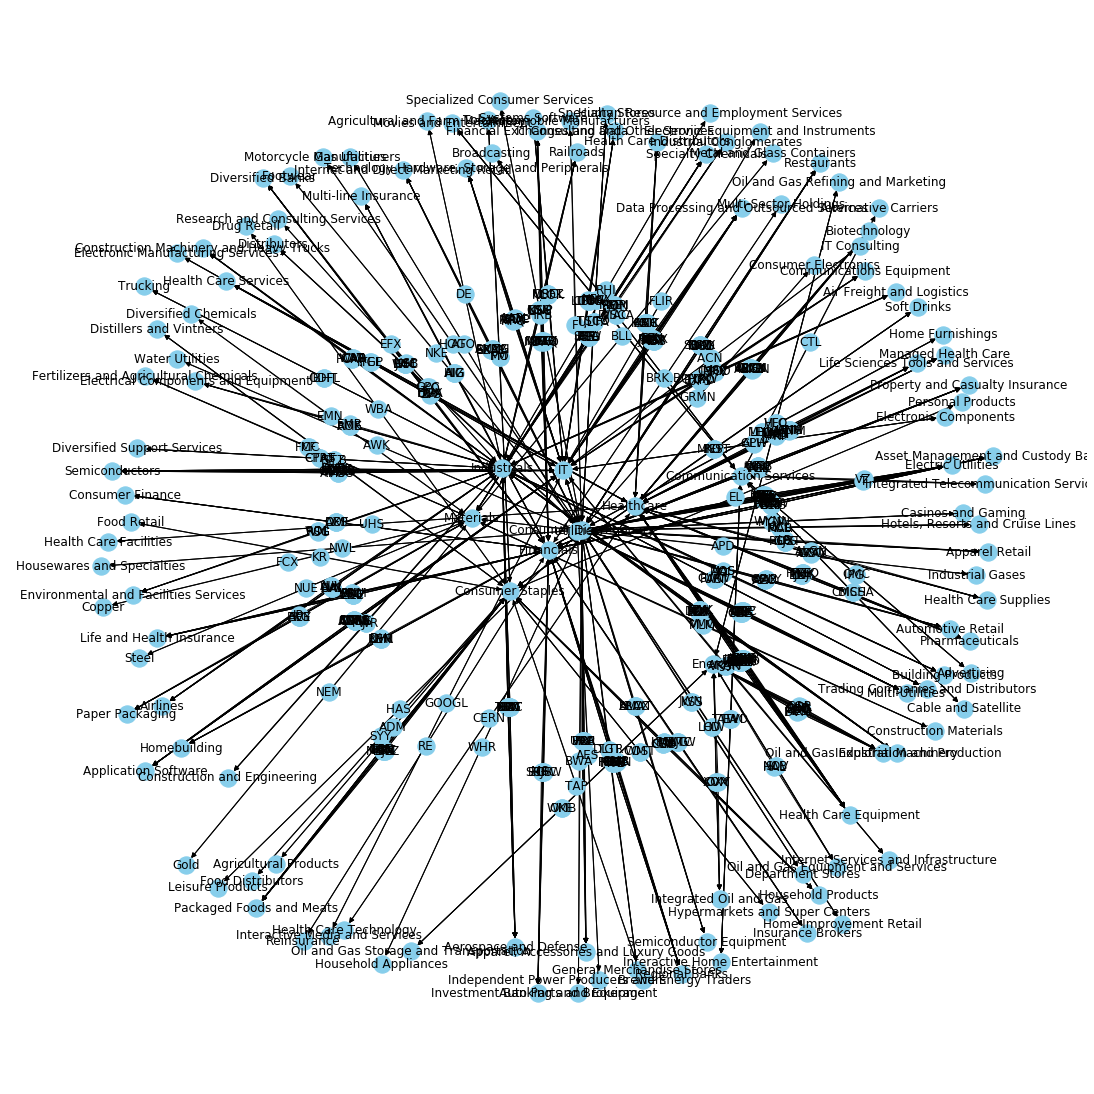

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

kg_df = pd.DataFrame({'source': source_target_df['Source'], 'target': source_target_df['Target'], 
                      'edge': source_target_df['Target']})
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr = True, create_using = nx.MultiDiGraph())
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues, pos = pos)
plt.show

In [10]:
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=200, workers=2)

Computing transition probabilities: 100%|██████████████████████████████████████████| 522/522 [00:00<00:00, 8155.78it/s]


In [11]:
model = node2vec.fit(window=10, min_count=1)

In [13]:
for node, _ in model.most_similar('T'):
    print(node)

CMI
SPGI
LNC
PNW
DPZ
HPQ
ES
Integrated Telecommunication Services
DISH
JBHT


C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


# Visualisation

In [ ]:
company_nodes = [x for x in model.wv.vocab]
embeddings = np.array([model.wv[x] for x in company_nodes])

In [ ]:
company_colors_dict = {'lightblue' : 

In [21]:
# Assign colors to players
company_colors_dict = {'lightblue' : {'T', 'ATVI', 'CTL', 'CMCSA', 'DISCA', 'DISH', 'DIS', 'EA', 'IPG' , 'LYV', 'NFLX', 'OMC', 'TTWO', 'VZ', 'VIAC'},
                      'r': AAP AZO BKNG BWA KMX CCL
CMG
DRI
DLTR
DPZ
DHI
EBAY
EXPE
F
GPS
GRMN
GPC
HRB
HBI
HOG
HAS 
HD
KSS
LB
LEG
LEN
LKQ
LOW
MAR
MCD
MGM
MHK
NWL
NKE
JWN
NVR
ORLY
PHM
PVH
RL
ROST
RCL
SBUX
TPR
TGT
TIF
TJX
TSCO
ULTA
UAA
VFC
WHR
WYNN
YUM
AMZN
 }

#    'chelsea': 'b',
#    'manchester_utd': 'r',
#    'manchester_city': 'teal',
#    'juventus': 'gainsboro',
#    'napoli': 'deepskyblue',
#    'fc_bayern': 'tomato' 
#}

source_target_df['color'] = source_target_df['Source'].apply(lambda x: company_colors_dict[x])
company_colors = dict(zip(source_target_df['Source'], source_target_df['color']))
colors = [company_colors[x] for x in company_nodes]

KeyError: 'AAP'

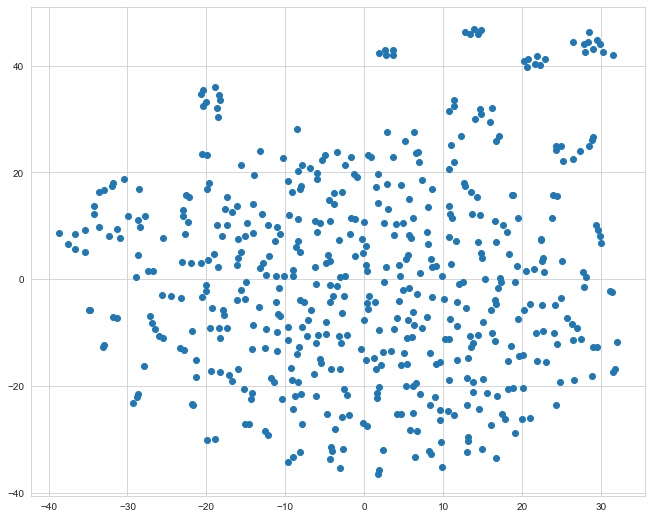

In [14]:
# ADD A COLOUR FOR DIFFERENT Industry
company_nodes = [x for x in model.wv.vocab]
embeddings = np.array([model.wv[x] for x in company_nodes])
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])